In [11]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import statistics
import os
import itertools
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm # グラデーション用

%matplotlib inline

/var/folders/_w/f4z7dgpj7ds3kb9z3rbqw3lc0000gn/T/ipykernel_2251/466962699.py:78: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(cont)
/var/folders/_w/f4z7dgpj7ds3kb9z3rbqw3lc0000gn/T/ipykernel_2251/466962699.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


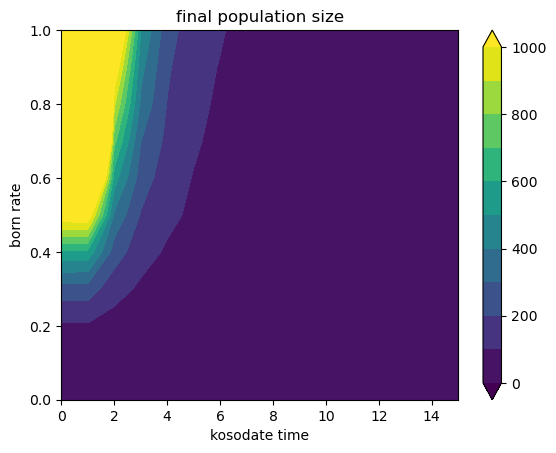

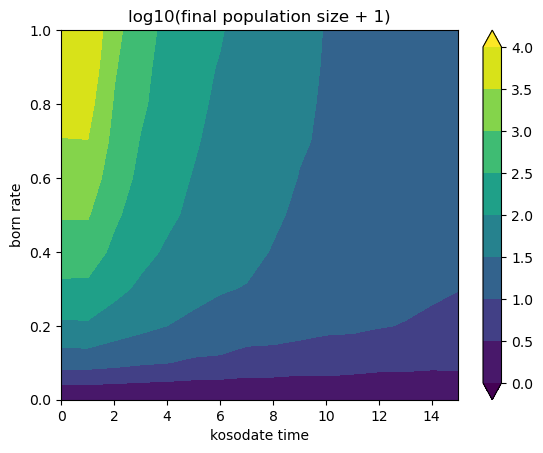

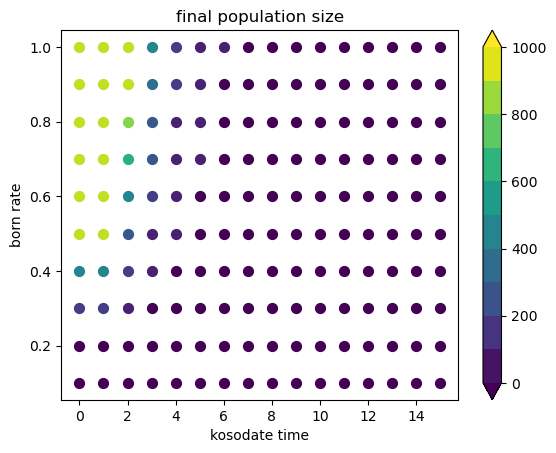

In [12]:
def main():
    # パラメータを変数に代入
    n = 176        # パラメータの数
    seed = 100     # seedの数
    iteration = 50 # 世代数

    # データの読み込み
    params = pd.read_csv('results/parameters.csv')
    population_size_mean = []
    population_size_log_mean = []
    
    # 各シミュレーションの最終個体数を取ってくる
    for j in range(1, n+1):
        population_size = []
        population_size_log = []

        for i in range(1, seed+1):
            df = pd.read_csv(f'results/result{i}/episode_{j}.csv')
            x = df['population_size'][iteration]
            population_size.append(x)
            population_size_log.append(math.log10(x+1))

        # 平均値を記録
        population_size_mean.append(np.mean(population_size))
        population_size_log_mean.append(np.mean(population_size_log))

    # カラーバー用
    cb_list = np.linspace(0, 1000, 11)
    cb_list_log = np.linspace(0, 4, 9)


    # 図1
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x, y = np.meshgrid(np.unique(params['kosodate_time']), np.unique(params['born_rate']))
    z = griddata((params['kosodate_time'], params['born_rate']), population_size_mean, (x, y))
    cont = ax.contourf(x, y, z, cb_list, cmap='viridis', extend='both')
    fig.colorbar(cont)

    ax.set_title('final population size')
    ax.set_xlabel('kosodate time')
    ax.set_ylabel('born rate')
    # ax.set_zlabel('final population size')
    fig.savefig('tmp1.png', dpi=600)


    # 図2
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x, y = np.meshgrid(np.unique(params['kosodate_time']), np.unique(params['born_rate']))
    z = griddata((params['kosodate_time'], params['born_rate']), population_size_log_mean, (x, y))
    cont_log = ax.contourf(x, y, z, cb_list_log, cmap='viridis', extend='both')
    fig.colorbar(cont_log)

    ax.set_title('log10(final population size + 1)')
    ax.set_xlabel('kosodate time')
    ax.set_ylabel('born rate')
    # ax.set_zlabel('log10(final population size + 1)')
    fig.savefig('tmp2.png', dpi=600)

    
    # 図3
    fig = plt.figure()
    ax = fig.add_subplot(111)
    p_size = pd.Series(population_size_mean, name='p_size')
    df_2 = pd.concat([params, p_size], axis=1)
    value = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10000] # 色分け用

    # p_sizeごとにdfをつくりそれぞれ違う色でプロット
    df_list =[]
    for i in range((len(value)-1)):
        data = df_2.query(f'{value[i]} < p_size <= {value[i+1]}')
        df_list.append(data)
    for i in range((len(value)-1)):
        df = df_list[i]
        ax.scatter(df['kosodate_time'], df['born_rate'], s=50, c=[cm.viridis(i/(len(value)-1))])

    fig.colorbar(cont)
    ax.set_title('final population size')
    ax.set_xlabel('kosodate time')
    ax.set_ylabel('born rate')
    # ax.set_zlabel('final population size')
    fig.savefig('tmp3.png', dpi=600)


    fig.show()

if __name__ == '__main__':
    main()